In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import time_series_transform.base as base
from time_series_transform.util import *
from time_series_transform.stock_transform.base import *
from time_series_transform.stock_transform.stock_extractor import *
import plotly.graph_objects as go
# import plotly.plotly as py

In [2]:
df = pd.read_csv('Data/aapl_stock_extract.csv')
df2 = pd.read_csv('Data/googl_stock_extract.csv')

stock = Stock('aapl',df)
stock2 = Stock('googl',df2)

port = Portfolio([stock,stock2])
port.make_technical_indicator('High','mvg10',moving_average,1,50,windowSize = 10)
port.make_technical_indicator('High','fft',rfft_transform,1,50)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


In [3]:
se = Stock_Extractor('googl', 'yahoo')
stock = se.get_stock_period('1y')
# stock.save(r"C:\Users\User\Documents\Development\Time-Series-Transformer\Data")

In [5]:
pe = Portfolio_Extractor(['shop.to','0051.TW','0050.TW'],'yahoo')
port = pe.get_portfolio_period('1y')

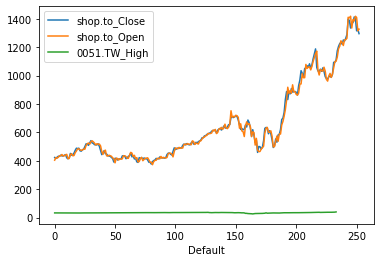

In [6]:
port.plot({'shop.to':['Close','Open'],'0051.TW':['High']},samePlot= True)

In [5]:
npx = stock.df['Close'].to_numpy()
type(ema(npx, span = 10))

numpy.ndarray

In [14]:
macdout = macd(npx)
for i in macdout:
    print(type(macdout[i]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
so = stochastic_oscillator(npx)
type(so['k_val'])
type(so['d_val'])

numpy.ndarray

In [20]:
rsout = rsi(npx)
type(rsout)

numpy.ndarray

In [22]:
type(williams_r(npx))

numpy.ndarray

In [4]:
df = stock.df


data=[dict(type='candlestick',
           x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
          yaxis = 'y2',
     name = 'stock')]
layout = dict()
fig = dict(data = data,layout=layout)

# fig['layout'] = dict()
fig['layout']['plot_bgcolor'] = 'rgb(250, 250, 250)'
fig['layout']['xaxis'] = dict( rangeselector = dict( visible = True ) )
fig['layout']['yaxis'] = dict( domain = [0, 0.2], showticklabels = False )
fig['layout']['yaxis2'] = dict( domain = [0.2, 0.8] )
fig['layout']['legend'] = dict( orientation = 'h', y=0.9, x=0.3, yanchor='bottom' )
fig['layout']['margin'] = dict( t=40, b=40, r=40, l=40 )

colors = []
INCREASING_COLOR = '#17BECF'
DECREASING_COLOR = '#7F7F7F'
for i in range(len(df['Close'])):
    if i != 0:
        if df['Close'][i] > df['Close'][i-1]:
            colors.append(INCREASING_COLOR)
        else:
            colors.append(DECREASING_COLOR)
    else:
        colors.append(DECREASING_COLOR)
        
fig['data'].append( dict( x=df['Date'], y=df['Volume'],                         
                         marker=dict( color=colors ),
                         type='bar', yaxis='y', name='Volume' ) )

ret = go.Figure(fig)
ret.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), #hide weekends
        dict(values=["2015-12-25", "2016-01-01"])  # hide Christmas and New Year's
    ]
)
ret.show()

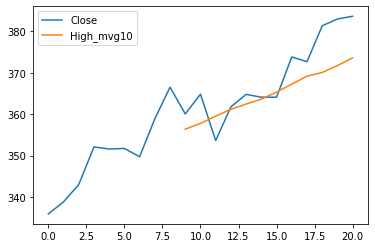

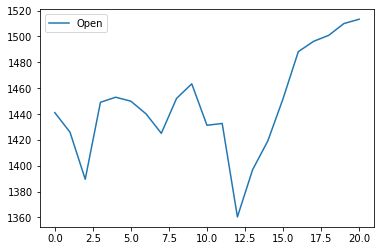

In [5]:
stockIndicators = {
    'aapl':['Close','High_mvg10'],
    'googl':['Open']
}
# port.plot(stockIndicators, samePlot = False)
port.plot(stockIndicators, keyCol = 'Date',samePlot = False)
 

In [3]:
x = stock.df[['Date','Close']].drop(2).set_index('Date')
y = stock.df[['Date', 'Open']].set_index('Date')
w = stock2.df[['Date','High']].set_index('Date')
df = [x,y,w]

# z = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
#                                             how='outer'), df)
# # z = pd.merge(x,y, left_on= 'Date',right_on='Date')
# z
# z.plot()
macd(stock.df['Close'])
# stock.macd_plot('Close')

{'EMA_12': array([202.09      , 201.4725    , 202.15845266, 201.54024569,
        202.42047536, 203.38284816, 204.0137172 , 204.13189169,
        204.36100673, 204.90088985, 205.16055279, 206.11522288,
        206.09000667, 205.32720457, 202.93720356, 201.57263557,
        200.77484571, 200.81614194, 200.58394465, 200.31058427,
        201.41749552, 201.37053683, 201.17393023, 201.74836473,
        202.82827462, 203.73883174, 204.85746288, 205.772519  ,
        205.03401096, 205.00241422, 204.61833991, 204.5042049 ,
        204.94070382, 205.26786636, 205.07995946, 205.45472795,
        206.397489  , 207.19157276, 208.00176137, 209.07360271,
        211.03204803, 212.61315146, 213.28702434, 214.03257642,
        214.78643594, 215.73973038, 216.26920867, 216.22470038,
        216.33785492, 216.27509322, 216.7328625 , 216.9463043 ,
        216.96379844, 217.76484934, 218.53648989, 218.33085827,
        218.43996498, 219.47849625, 220.36338937, 220.70749857,
        221.39867858, 222.4512

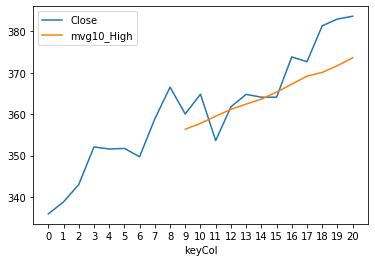

In [22]:

stockIndicators = {
    'aapl':['Date','Close','High_mvg10'],
    'googl':['Open']
}

keyArr = [i for i in range(port.stockDict['aapl'].df.shape[0])]
x = port.stockDict['aapl'].df[stockIndicators['aapl']]
x.insert(0,'keyCol',keyArr)
x = x.set_index('keyCol')
x.plot(xticks=x.index)
# plt.plot(x)
# x

In [7]:
import pandas as pd
import numpy as np
x = [i for i in range(20)]
xx = np.array(x)
df = pd.DataFrame(data = x, columns = ['omg'])
df2 = pd.DataFrame(data = x, columns = ['omg1'])
y = {}
y['1'] = xx
y['2'] = xx
z = y['1'] - y['2']
type(z)

df = pd.DataFrame(x)
z = df.rolling(1)
z

Rolling [window=1,center=False,axis=0]

In [6]:
stock.df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,High_mvg10,High_fft,symbol
0,2019-07-16,202.18,203.68,201.10,202.09,16866800,0.0,0,NaN,NaN,aapl
1,2019-07-17,201.64,202.67,200.87,200.95,14107500,0.0,0,NaN,285.600897,aapl
2,2019-07-18,201.59,203.45,201.30,203.23,18582200,0.0,0,NaN,255.962488,aapl
3,2019-07-19,203.36,204.06,199.97,200.20,20929300,0.0,0,NaN,229.843708,aapl
4,2019-07-22,201.25,204.79,201.21,204.78,22277900,0.0,0,NaN,209.426162,aapl
...,...,...,...,...,...,...,...,...,...,...,...
248,2020-07-09,385.05,385.27,378.69,383.01,31410700,0.0,0,371.747,395.668925,aapl
249,2020-07-10,381.34,383.92,378.82,383.68,22564300,0.0,0,373.639,385.523832,aapl
250,2020-07-13,389.06,399.82,381.03,381.91,47912300,0.0,0,377.089,368.148149,aapl
251,2020-07-14,379.36,389.02,375.51,388.23,42747300,0.0,0,379.774,344.380404,aapl


In [5]:
x = stochastic_oscillator(stock.df['Close'].values)
# type(x['k_val'])
x

{'k_val': array([[         nan],
        [         nan],
        [         nan],
        [         nan],
        [         nan],
        [         nan],
        [         nan],
        [         nan],
        [ 82.36245955],
        [100.        ],
        [ 87.30385164],
        [100.        ],
        [ 23.36134454],
        [  0.        ],
        [  0.        ],
        [ 18.59270673],
        [ 28.91628146],
        [ 51.20698511],
        [ 42.68104777],
        [ 40.11299435],
        [100.        ],
        [ 61.98398028],
        [ 55.82255083],
        [ 80.57097542],
        [100.        ],
        [100.        ],
        [100.        ],
        [ 98.50746269],
        [  8.23311748],
        [ 43.57076781],
        [ 22.20166512],
        [ 28.93145161],
        [ 63.70967742],
        [ 60.98790323],
        [ 30.64516129],
        [ 66.73511294],
        [100.        ],
        [ 99.77900552],
        [100.        ],
        [100.        ],
        [100.        ],
       

In [15]:
rsv_day = 9
alpha = 1/3
ret = {}
arr = stock.df['Close'].values
df = pd.DataFrame(arr)

rsv_rolling = df.rolling(rsv_day)
rst= 100*(df - rsv_rolling.min())/(rsv_rolling.max() - rsv_rolling.min())
rst.rolling(3).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,98.087702
249,100.000000
250,96.985181
251,96.985181


In [10]:
from collections import defaultdict

In [10]:
macd(stock.df['Close'])

{'EMA_12': array([202.09      , 201.4725    , 202.15845266, 201.54024569,
        202.42047536, 203.38284816, 204.0137172 , 204.13189169,
        204.36100673, 204.90088985, 205.16055279, 206.11522288,
        206.09000667, 205.32720457, 202.93720356, 201.57263557,
        200.77484571, 200.81614194, 200.58394465, 200.31058427,
        201.41749552, 201.37053683, 201.17393023, 201.74836473,
        202.82827462, 203.73883174, 204.85746288, 205.772519  ,
        205.03401096, 205.00241422, 204.61833991, 204.5042049 ,
        204.94070382, 205.26786636, 205.07995946, 205.45472795,
        206.397489  , 207.19157276, 208.00176137, 209.07360271,
        211.03204803, 212.61315146, 213.28702434, 214.03257642,
        214.78643594, 215.73973038, 216.26920867, 216.22470038,
        216.33785492, 216.27509322, 216.7328625 , 216.9463043 ,
        216.96379844, 217.76484934, 218.53648989, 218.33085827,
        218.43996498, 219.47849625, 220.36338937, 220.70749857,
        221.39867858, 222.4512

In [11]:
cc = stock.df['Close']
ema(cc, span = 12).mean().to_numpy()
# cc.ewm(span=12).mean()

array([202.09      , 201.4725    , 202.15845266, 201.54024569,
       202.42047536, 203.38284816, 204.0137172 , 204.13189169,
       204.36100673, 204.90088985, 205.16055279, 206.11522288,
       206.09000667, 205.32720457, 202.93720356, 201.57263557,
       200.77484571, 200.81614194, 200.58394465, 200.31058427,
       201.41749552, 201.37053683, 201.17393023, 201.74836473,
       202.82827462, 203.73883174, 204.85746288, 205.772519  ,
       205.03401096, 205.00241422, 204.61833991, 204.5042049 ,
       204.94070382, 205.26786636, 205.07995946, 205.45472795,
       206.397489  , 207.19157276, 208.00176137, 209.07360271,
       211.03204803, 212.61315146, 213.28702434, 214.03257642,
       214.78643594, 215.73973038, 216.26920867, 216.22470038,
       216.33785492, 216.27509322, 216.7328625 , 216.9463043 ,
       216.96379844, 217.76484934, 218.53648989, 218.33085827,
       218.43996498, 219.47849625, 220.36338937, 220.70749857,
       221.39867858, 222.451223  , 224.27569926, 225.76

In [25]:
ema(stock.df['Close'], alpha = 0.1, adjust = False).mean()

0      202.090000
1      201.976000
2      202.101400
3      201.911260
4      202.198134
          ...    
248    361.063373
249    363.325036
250    365.183532
251    367.488179
252    369.829361
Name: Close, Length: 253, dtype: float64

In [13]:
def strided_app(a, L, S): # Window len = L, Stride len/stepsize = S

    nrows = ((a.size - L) // S) + 1

    n = a.strides[0]

    return np.lib.stride_tricks.as_strided(a, shape=(nrows, L), strides=(S * n, n))

def numpyEWMA(price, windowSize):

    weights = np.exp(np.linspace(-1., 0., windowSize))

    weights /= weights.sum()

    a2D = strided_app(price, windowSize, 1)

    returnArray = np.empty((price.shape[0]))

    returnArray.fill(np.nan)

    for index in (range(a2D.shape[0])):

        returnArray[index + windowSize-1] = np.convolve(weights, a2D[index])[windowSize - 1:-windowSize + 1]

    return np.reshape(returnArray, (-1, 1))

In [20]:
numpyEWMA(stock.df['Close'].to_numpy(), 10)

array([[         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [203.52959645],
       [203.94272697],
       [204.84692252],
       [205.19496169],
       [205.86328176],
       [205.19933491],
       [204.38582758],
       [203.62241976],
       [203.30515196],
       [202.73047913],
       [201.72306961],
       [201.238784  ],
       [199.60420003],
       [198.51871882],
       [198.34171331],
       [200.21247205],
       [201.66946744],
       [203.07589212],
       [203.87689054],
       [204.50111739],
       [205.50660326],
       [205.02192704],
       [205.63965123],
       [206.70412709],
       [207.05122833],
       [206.59630132],
       [206.28570323],
       [205.77681956],
       [205.23851324],
       [206.39520625],
       [207.16336023],
       [208.8203736 ],
       [210.40559941],
       [211.32414777],
       [212

In [34]:
def ewma_vectorized(data, alpha, offset=None, dtype=None, order='C', out=None):
    """
    Calculates the exponential moving average over a vector.
    Will fail for large inputs.
    :param data: Input data
    :param alpha: scalar float in range (0,1)
        The alpha parameter for the moving average.
    :param offset: optional
        The offset for the moving average, scalar. Defaults to data[0].
    :param dtype: optional
        Data type used for calculations. Defaults to float64 unless
        data.dtype is float32, then it will use float32.
    :param order: {'C', 'F', 'A'}, optional
        Order to use when flattening the data. Defaults to 'C'.
    :param out: ndarray, or None, optional
        A location into which the result is stored. If provided, it must have
        the same shape as the input. If not provided or `None`,
        a freshly-allocated array is returned.
    """
    data = np.array(data, copy=False)
    if dtype is None:
        if data.dtype == np.float32:
            dtype = np.float32
        else:
            dtype = np.float64
    else:
        dtype = np.dtype(dtype)
    if data.ndim > 1:
        # flatten input
        data = data.reshape(-1, order)
    if out is None:
        out = np.empty_like(data, dtype=dtype)
    else:
        assert out.shape == data.shape
        assert out.dtype == dtype
    if data.size < 1:
        # empty input, return empty array
        return out
    if offset is None:
        offset = data[0]
    alpha = np.array(alpha, copy=False).astype(dtype, copy=False)
    # scaling_factors -> 0 as len(data) gets large
    # this leads to divide-by-zeros below
    scaling_factors = np.power(1. - alpha, np.arange(data.size + 1, dtype=dtype),
                               dtype=dtype)
    # create cumulative sum array
    np.multiply(data, (alpha * scaling_factors[-2]) / scaling_factors[:-1],
                dtype=dtype, out=out)
    np.cumsum(out, dtype=dtype, out=out)
    # cumsums / scaling
    out /= scaling_factors[-2::-1]
    if offset != 0:
        offset = np.array(offset, copy=False).astype(dtype, copy=False)
        # add offsets
        out += offset * scaling_factors[1:]
    return out

In [35]:
ewma_vectorized(stock.df['Close'].to_numpy(), 0.1)

array([202.09      , 201.976     , 202.1014    , 201.91126   ,
       202.198134  , 202.6163206 , 202.97568854, 203.13611969,
       203.35150772, 203.73735695, 203.99562125, 204.64905913,
       204.78115321, 204.46403789, 203.1236341 , 202.27927069,
       201.72034362, 201.65130926, 201.42317833, 201.1678605 ,
       201.78007445, 201.71406701, 201.55466031, 201.88319427,
       202.56087485, 203.17178736, 203.94760863, 204.62784776,
       204.26606299, 204.32245669, 204.14221102, 204.11598992,
       204.43739093, 204.69965183, 204.63468665, 204.92221799,
       205.58699619, 206.18329657, 206.80996691, 207.62497022,
       209.0414732 , 210.26732588, 210.93959329, 211.65863396,
       212.38577057, 213.24519351, 213.83867416, 214.05280674,
       214.34352607, 214.50217346, 214.97695611, 215.2912605 ,
       215.46813445, 216.13832101, 216.80248891, 216.84224002,
       217.06201601, 217.87481441, 218.61033297, 219.00929967,
       219.62836971, 220.48953274, 221.87157946, 223.08